In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("Images/people1.jpg")
image.shape

(1280, 1920, 3)

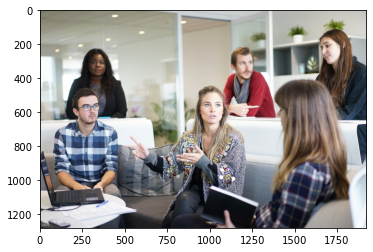

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

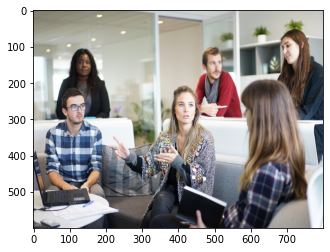

In [4]:
image = cv2.resize(image,(800,600))
plt.imshow(image)
plt.show()

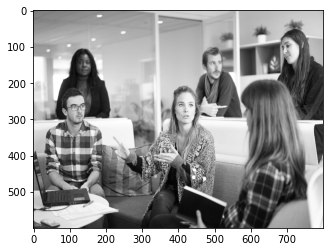

In [5]:
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray,cmap='gray')
plt.show()

In [6]:
image_gray.shape

(600, 800)

### Haar Cascade

In [7]:
face_detector = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")

In [8]:
detections = face_detector.detectMultiScale(image_gray)
detections

array([[115, 124,  53,  53],
       [677,  72,  68,  68],
       [475, 123,  59,  59],
       [390, 323,  56,  56],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66]], dtype=int32)

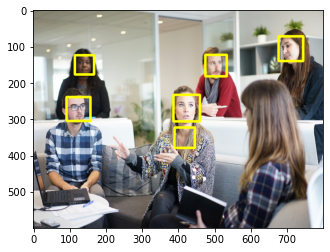

In [9]:
for (x,y,w,h) in detections:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),5)
plt.imshow(image)
plt.show()

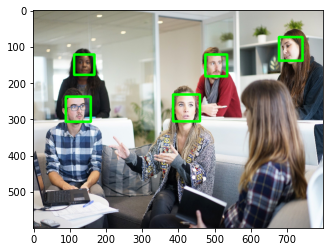

In [10]:
image = cv2.imread("Images/people1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(800,600))
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
detections = face_detector.detectMultiScale(image_gray,
                                            scaleFactor = 1.09)
for (x,y,w,h) in detections:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(image)
plt.show()

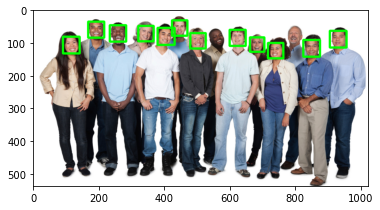

In [11]:
image = cv2.imread("Images/people2.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
detections = face_detector.detectMultiScale(image_gray,
                                            scaleFactor=1.2,
                                            minNeighbors=7,
                                            minSize=(30,30),
                                            maxSize=(100,100))
for (x,y,w,h) in detections:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(image)
plt.show()

In [12]:
eye_detector = cv2.CascadeClassifier("Cascades/haarcascade_eye.xml")

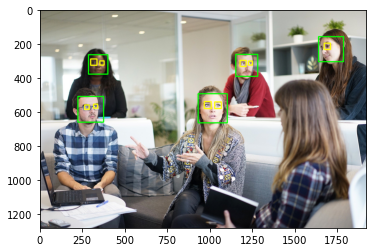

In [13]:
image = cv2.imread("Images/people1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image,(800,600))
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
face_detections = face_detector.detectMultiScale(image_gray,
                                            scaleFactor = 1.3,
                                                minSize=(30,30))
for (x,y,w,h) in face_detections:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)

eye_detections = eye_detector.detectMultiScale(image_gray,
                                              scaleFactor = 1.1,
                                              minNeighbors=10,
                                              maxSize=(60,60))
for (x,y,w,h) in eye_detections:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),5)
    
plt.imshow(image)
plt.show()

### HOG: Histograms Of Oriented Gradients

In [39]:
import dlib

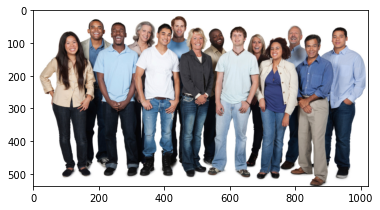

In [43]:
image = cv2.imread("Images/people2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [44]:
face_detector_hog = dlib.get_frontal_face_detector()

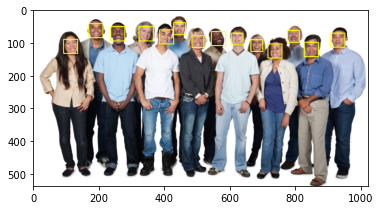

In [45]:
detections = face_detector_hog(image,1)
for face in detections:
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(image,(l,t),(r,b),(255,255,0),2)
plt.imshow(image)
plt.show()

### Convolutional Neural Networks

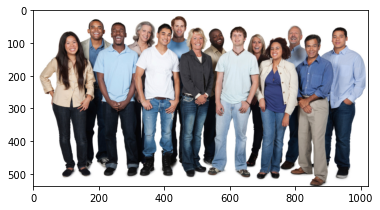

In [56]:
image = cv2.imread("Images/people2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [57]:
cnn_detector = dlib.cnn_face_detection_model_v1("Weights/mmod_human_face_detector.dat")

In [58]:
detections = cnn_detector(image,1)

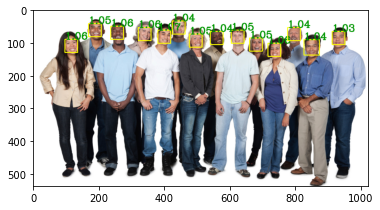

In [59]:
for face in detections:
    l,t = face.rect.left(),face.rect.top()
    r,b = face.rect.right(),face.rect.bottom()
    c = face.confidence
    cv2.rectangle(image,(l,t),(r,b),(255,255,0),2)
    cv2.putText(image,f"{c:.2f}",(l,t),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),2)
plt.imshow(image)
plt.show()